In [146]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import json
import datetime
import pytz
import gc
from textblob import TextBlob
from datetime import date

In [147]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix


from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from sklearn.feature_extraction import text
import nltk
import re
from scipy.signal import find_peaks

from summarizers import Summarizers


In [148]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
summarize = Summarizers('normal')

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'BartTokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


In [4]:
tweet_path = '../ECE219_tweet_data/'
pst_tz = pytz.timezone('America/Los_Angeles')

### Q9.1) Report the following statistics for each hashtag

In [5]:
def get_avg_tweet_per_hour(data):
    df = pd.DataFrame(data,columns=['timestamp'])
    group = df.groupby(pd.Grouper(key = 'timestamp',freq = '60min'))
    avg_tweet = len(data) / len(group)
    return avg_tweet

def get_avg_follower_per_tweet(data):
    return np.mean(data)

def get_avg_retweet_per_tweet(data):
    return np.mean(data)

def get_statistics(file):
    time = []
    num_retweet = []
    num_follower = []
    for line in open(file):
        json_object = json.loads(line)
        time.append(datetime.datetime.fromtimestamp(json_object['citation_date']))
        num_retweet.append(json_object['metrics']['citations']['total'])
        num_follower.append(json_object['author']['followers'])
    avg_tweets = get_avg_tweet_per_hour(time)
    avg_follower = get_avg_follower_per_tweet(num_follower)
    avg_retweet = get_avg_retweet_per_tweet(num_retweet)
    return avg_tweets, avg_follower, avg_retweet

In [6]:
filename = os.path.join(tweet_path, 'tweets_#gohawks.txt')

avg_tweets, avg_follower, avg_retweet = get_statistics(filename)

print("Average number of tweets per hour #goHwaks: ", avg_tweets)
print("Average number of followers of users posting tweet #goHwaks: ", avg_follower)
print("Average number of retweets per tweet #goHwaks: ", avg_retweet)

Average number of tweets per hour #goHwaks:  292.09326424870466
Average number of followers of users posting tweet #goHwaks:  2217.9237355281984
Average number of retweets per tweet #goHwaks:  2.0132093991319877


In [7]:
filename = os.path.join(tweet_path, 'tweets_#gopatriots.txt')

avg_tweets, avg_follower, avg_retweet = get_statistics(filename)

print("Average number of tweets per hour #gopatriots: ", avg_tweets)
print("Average number of followers of users posting tweet #gopatriots: ", avg_follower)
print("Average number of retweets per tweet #gopatriots: ", avg_retweet)

Average number of tweets per hour #gopatriots:  40.888695652173915
Average number of followers of users posting tweet #gopatriots:  1427.2526051635405
Average number of retweets per tweet #gopatriots:  1.4081919101697078


In [8]:
filename = os.path.join(tweet_path, 'tweets_#nfl.txt')

avg_tweets, avg_follower, avg_retweet = get_statistics(filename)

print("Average number of tweets per hour #nfl: ", avg_tweets)
print("Average number of followers of users posting tweet #nfl: ", avg_follower)
print("Average number of retweets per tweet #nfl: ", avg_retweet)

Average number of tweets per hour #nfl:  396.97103918228277
Average number of followers of users posting tweet #nfl:  4662.37544523693
Average number of retweets per tweet #nfl:  1.5344602655543254


In [9]:

filename = os.path.join(tweet_path, 'tweets_#patriots.txt')

avg_tweets, avg_follower, avg_retweet = get_statistics(filename)

print("Average number of tweets per hour #patriots: ", avg_tweets)
print("Average number of followers of users posting tweet #patriots: ", avg_follower)
print("Average number of retweets per tweet #patriots: ", avg_retweet)

Average number of tweets per hour #patriots:  750.6320272572402
Average number of followers of users posting tweet #patriots:  3280.4635616550277
Average number of retweets per tweet #patriots:  1.7852871288476946


In [10]:
filename = os.path.join(tweet_path, 'tweets_#sb49.txt')

avg_tweets, avg_follower, avg_retweet = get_statistics(filename)

print("Average number of tweets per hour #sb49: ", avg_tweets)
print("Average number of followers of users posting tweet #sb49: ", avg_follower)
print("Average number of retweets per tweet #sb49: ", avg_retweet)

Average number of tweets per hour #sb49:  1275.5557461406518
Average number of followers of users posting tweet #sb49:  10374.160292019487
Average number of retweets per tweet #sb49:  2.52713444111402


In [11]:
filename = os.path.join(tweet_path, 'tweets_#superbowl.txt')

avg_tweets, avg_follower, avg_retweet = get_statistics(filename)

print("Average number of tweets per hour #superbowl: ", avg_tweets)
print("Average number of followers of users posting tweet #superbowl: ", avg_follower)
print("Average number of retweets per tweet #superbowls: ", avg_retweet)

Average number of tweets per hour #superbowl:  2067.824531516184
Average number of followers of users posting tweet #superbowl:  8814.96799424623
Average number of retweets per tweet #superbowls:  2.3911895819207736


### Question 9.2) Plot “number of tweets in hour” 

In [12]:
def get_number_tweets_in_hours(filename):
    citation_dates = []
    for line in open(filename):
        json_object = json.loads(line)
        citation_dates.append(json_object['citation_date'])
    dates_frame = pd.DataFrame(sorted(citation_dates), columns = ['date'])
    dates_frame['date'] = dates_frame['date'].apply(lambda x: datetime.datetime.fromtimestamp(x))
    dates_frame['day'] = dates_frame['date'].apply(lambda x: str(x).split(' ')[0].split('-')[2]).astype('int')
    dates_frame['hour'] = dates_frame['date'].apply(lambda x: str(x).split(' ')[1].split(':')[0]).astype('int')
    
    days = dates_frame['day'].to_numpy()
    hour = dates_frame['hour'].to_numpy()
    tweets_cnt = []
    k = 0
    while True:
        if k >= len(days):
            break

        j = k

        cnt = 0
        curr_hour = hour[j]
        curr_day = days[j]
        while j < len(days) and curr_hour == hour[j] and curr_day == days[j]:
            cnt+= 1
            j+= 1

        k = j

        tweets_cnt.append(cnt)

        if k >= len(days):
            break
    return tweets_cnt



In [13]:
filename = os.path.join(tweet_path, 'tweets_#superbowl.txt')
tweets_cnt_superbowl = get_number_tweets_in_hours(filename)

Text(0, 0.5, 'Tweets per hour')

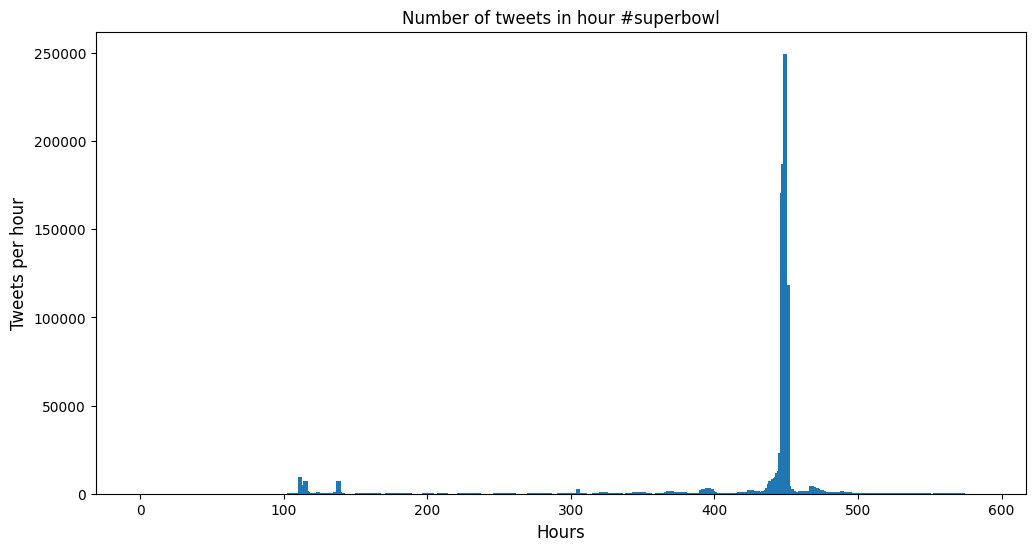

In [14]:
fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(6)

plt.bar(np.arange(len(tweets_cnt_superbowl)), tweets_cnt_superbowl, width=3)
plt.title("Number of tweets in hour #superbowl", size = 12)
plt.xlabel("Hours", size = 12)
plt.ylabel("Tweets per hour", size = 12)

In [15]:
filename = os.path.join(tweet_path, 'tweets_#nfl.txt')
tweets_cnt_nfl = get_number_tweets_in_hours(filename)

Text(0, 0.5, 'Tweets per hour')

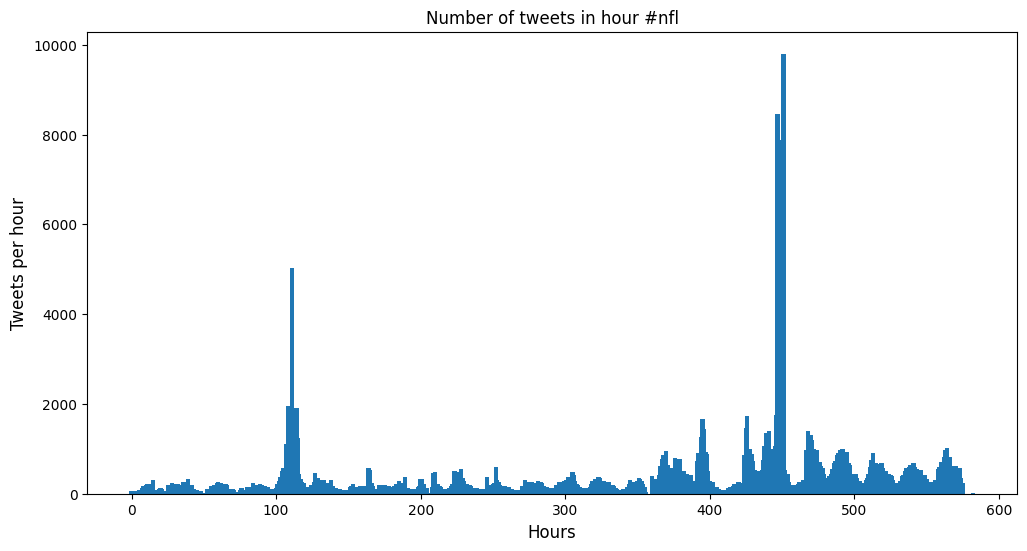

In [16]:
fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(6)

plt.bar(np.arange(len(tweets_cnt_nfl)), tweets_cnt_nfl, width=3)
plt.title("Number of tweets in hour #nfl", size = 12)
plt.xlabel("Hours", size = 12)
plt.ylabel("Tweets per hour", size = 12)

## Question 10) Define your own task

### Fan Base analysis Before, During and After the Match

In [20]:
patriots_roster = ['Akeem Ayers','Alan Branch','Brandon Bolden','Brandon Browner','Brandon LaFell',
 'Brian Tyms','Bryan Stork','Cameron Fleming','Chandler Jones','Chris Jones', 'Chris White','Dan Connolly',
 'Danny Aiken','Danny Amendola','Darius Fleming','Darrelle Revis','Devin McCourty','Donta Hightower',
 'Duron Harmon','James Develin','James White','Jamie Collins','Jimmy Garoppolo','Joe Vellano',
 'Jonas Gray','Jonathan Casillas','Jordan Devey','Josh Boyce','Josh Fline','Julian Edelman','Kyle Arrington',
 'LeGarrette Blount','Logan Ryan','Malcolm Butler','Marcus Cannon','Matthew Slater','Michael Hoomanawanui',
 'Nate Ebner','Nate Solder','Patrick Chung','Rob Gronkowski','Rob Ninkovich','Ryan Allen','Ryan Wendell',
 'Sealver Siliga','Sebastian Vollmer','Shane Vereen','Stephen Gostkowski','Tavon Wilson','Tim Wright',
 'Tom Brady','Vince Wilfork','Zach Moore']

In [25]:
hawks_roster = ['Alvin Bailey','BJ Daniels','Bobby Wagner','Brock Coyle','Bruce Irvin','Bryan Walters',
'Byron Maxwell','Chris Matthews','Christine Michael','Cliff Avril','Clint Gresham','Cooper Helfet',
 'David King','DeShawn Shead','Demarcus Dobbs','Doug Baldwin','Earl Thomas','JR Sweezy','James Carpenter',
 'Jeremy Lane','Jermaine Kearse','Jeron Johnson','Jon Ryan','Justin Britt','KJ Wright','Kam Chancellor',
 'Keavon Milton','Kevin Norwood','Kevin Williams','Landon Cohen','Lemuel Jeanpierre','Luke Wilson',
 'Malcolm Smith','Marcus Burley','Marshawn Lynch','Max Unger','Michael Bennett','Mike Morgan',
 'OBrien Schofield','Patrick Lewis','Ricardo Lockette','Richard Sherman','Robert Turbin','Russell Okung',
 'Russell Wilson','Steven Hauschka','Steven Terrell','Tarvaris Jackson','Tharold Simon','Tony McDaniel',
 'Tony Moeaki','Will Tukuafu']

In [27]:
def preprocess_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    polarity = analysis.sentiment.polarity
    subjectivity = analysis.sentiment.subjectivity
    if polarity > 0:
        return 1 , polarity, subjectivity
    elif polarity == 0:
        return 0, polarity, subjectivity
    else:
        return -1, polarity, subjectivity
    
    
def get_sentiment_vader(tweet):
    sentiment_analy = sid_obj.polarity_scores(tweet)
    if sentiment['compound'] >= 0.05 :
        return 1
    elif sentiment['compound'] <= - 0.05 :
        return -1
    else :
        return 0


In [37]:
sentiment_analy = SentimentIntensityAnalyzer()

def create_data(filename):
    tmp = []
    tweets = []
    regx = r'(?<![@\w])@(\w{1,25})'
    link_reg1 = r"http\S+"
    link_reg2 = r"www.\S+"

    tweet_columns = ['citation_date', 'user', 'tweet', 'sentiment', 'retweeted', 'followers_count',
               'friends_count', 'location', 'possibly_sensitive',
              'lang', 'filter_level', 'retweets', 'ranking_score', 'impressions', 'geo', 'lat', 'long', 
               'mentions', 'source', 'hasLink']

    file = open(os.path.join(tweet_path, filename))
    for line in file:
        json_object = json.loads(line)

        tmp = np.append(tmp, json_object['citation_date'])
        tmp = np.append(tmp, json_object['tweet']['user']['id'])

        raw_data = json_object['tweet']['text']
        cleaned_tweet = preprocess_tweet(raw_data)
    
        tmp = np.append(tmp, cleaned_tweet)
        
        level, polarity, subjectivity = get_sentiment(cleaned_tweet)
        

        tmp = np.append(tmp, level)
        
        tmp = np.append(tmp, json_object['tweet']['retweeted'])
        tmp = np.append(tmp, json_object['tweet']['user']['followers_count'])
        tmp = np.append(tmp, json_object['tweet']['user']['friends_count'])
        
        location = '0'
        if json_object['tweet']['user']['location']:
            location = json_object['tweet']['user']['location']

        tmp = np.append(tmp, location)
        
        
        tmp = np.append(tmp, json_object['tweet']['possibly_sensitive'])
        tmp = np.append(tmp, json_object['tweet']['lang'])
        tmp = np.append(tmp, json_object['tweet']['filter_level'])
        tmp = np.append(tmp, json_object['metrics']['citations']['total'])
        tmp = np.append(tmp, json_object['metrics']['ranking_score'])
        tmp = np.append(tmp, json_object['metrics']['impressions'])
        tmp = np.append(tmp, json_object['tweet']['geo'])

        latitude = None
        longitude = None
        if json_object['tweet']['coordinates']:
            latitude = str(json_object['tweet']['coordinates'][list(json_object['tweet']['coordinates'].keys())[1]][1])
            longitude = str(json_object['tweet']['coordinates'][list(json_object['tweet']['coordinates'].keys())[1]][0])

        tmp = np.append(tmp, latitude)
        tmp = np.append(tmp, longitude)

        menti = re.findall(regx, json_object['tweet']['text'])
        ment = ','.join(menti)

        tmp = np.append(tmp, ment)
        src = re.sub("<[^>]*>", "", json_object['tweet']['source'])
        tmp = np.append(tmp, src)

        link1 = re.findall(link_reg1, json_object['tweet']['text'])
        link2 = re.findall(link_reg2, json_object['tweet']['text'])
        link = 0

        if len(link1) or len(link2):
            link = 1

        tmp = np.append(tmp, link)


        tweets.append(tmp)
        tmp = []
       
    file.close()
    return pd.DataFrame(tweets, columns=tweet_columns)

In [58]:
# files = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt', 'tweets_#patriots.txt', 
#         'tweets_#sb49.txt', 'tweets_#superbowl.txt']


gohawks_data = createData('tweets_#gohawks.txt')
print("gohawks data processed")
gopatriots_data = createData('tweets_#gopatriots.txt')
print("gopatriots data processed")
nfl_data = createData('tweets_#nfl.txt')
print("nfl data processed")
patriots_data = createData('tweets_#patriots.txt')
print("patriots data processed")
sb49_data = createData('tweets_#sb49.txt')
print("sb49 data processed")
superbowl_data = createData('tweets_#superbowl.txt')
print("superbowl data processed")


gohawks data processed
gopatriots data processed
nfl data processed
patriots data processed
sb49 data processed
superbowl data processed


In [59]:
print(len(gohawks_data), print(len(gopatriots_data)), len(patriots_data), len(nfl_data), len(sb49_data), len(superbowl_data))

23511
169122 None 440621 233022 743649 1213813


#### Arranging the tweet data according to the time stamp 

In [60]:
gohawks_data['citation_date'] = pd.to_numeric(gohawks_data['citation_date']).astype(np.int64)
gohawks_data = gohawks_data.sort_values(by = ['citation_date'], ignore_index=True)
gohawks_data['citation_date'] = gohawks_data['citation_date'].apply(lambda x: datetime.datetime.fromtimestamp(x, pst_tz))


gopatriots_data['citation_date'] = pd.to_numeric(gopatriots_data['citation_date']).astype(np.int64)
gopatriots_data = gopatriots_data.sort_values(by = ['citation_date'], ignore_index=True)
gopatriots_data['citation_date'] = gopatriots_data['citation_date'].apply(lambda x: datetime.datetime.fromtimestamp(x, pst_tz))


nfl_data['citation_date'] = pd.to_numeric(nfl_data['citation_date']).astype(np.int64)
nfl_data = nfl_data.sort_values(by = ['citation_date'], ignore_index=True)
nfl_data['citation_date'] = nfl_data['citation_date'].apply(lambda x: datetime.datetime.fromtimestamp(x, pst_tz))

patriots_data['citation_date'] = pd.to_numeric(patriots_data['citation_date']).astype(np.int64)
patriots_data = patriots_data.sort_values(by = ['citation_date'], ignore_index=True)
patriots_data['citation_date'] = patriots_data['citation_date'].apply(lambda x: datetime.datetime.fromtimestamp(x, pst_tz))

sb49_data['citation_date'] = pd.to_numeric(sb49_data['citation_date']).astype(np.int64)
sb49_data = sb49_data.sort_values(by = ['citation_date'], ignore_index=True)
sb49_data['citation_date'] = sb49_data['citation_date'].apply(lambda x: datetime.datetime.fromtimestamp(x, pst_tz))

superbowl_data['citation_date'] = pd.to_numeric(superbowl_data['citation_date']).astype(np.int64)
superbowl_data = superbowl_data.sort_values(by = ['citation_date'], ignore_index=True)
superbowl_data['citation_date'] = superbowl_data['citation_date'].apply(lambda x: datetime.datetime.fromtimestamp(x, pst_tz))

In [63]:
def split_data_accd_kickoff_time(tweet_data, kickoff_time, end_time):
    first_tweet = tweet_data.head(1)['citation_date']
    last_tweet = tweet_data.tail(1)['citation_date']
    
    before = int(str(datetime.datetime.fromisoformat(kickoff_time) - first_tweet[0]).split(' ')[0])
    after = int(str(last_tweet[len(tweet_data) - 1] - datetime.datetime.fromisoformat(end_time)).split(' ')[0])
    
    no_twt_in_game = tweet_data[(tweet_data['citation_date'] >= kickoff_time) & (tweet_data['citation_date'] <= end_time)]
    
    no_twt_before_game = tweet_data[(tweet_data['citation_date'] < kickoff_time)]

    no_twt_after_game = tweet_data[(tweet_data['citation_date'] > end_time)]
    
    return no_twt_in_game, no_twt_before_game, no_twt_after_game, before, after


In [64]:
kickoff_time = '2015-02-01 15:00:00-08:00'
end_time = '2015-02-01 20:00:00-08:00'

gohawks_in_game, gohawks_before_game, gohawks_after_game, gohawks_before, gohawks_after = split_data_accd_kickoff_time(gohawks_data, kickoff_time, end_time)
gopatriots_in_game, gopatriots_before_game, gopatriots_after_game, gopatriots_before, gopatriots_after = split_data_accd_kickoff_time(gopatriots_data, kickoff_time, end_time)

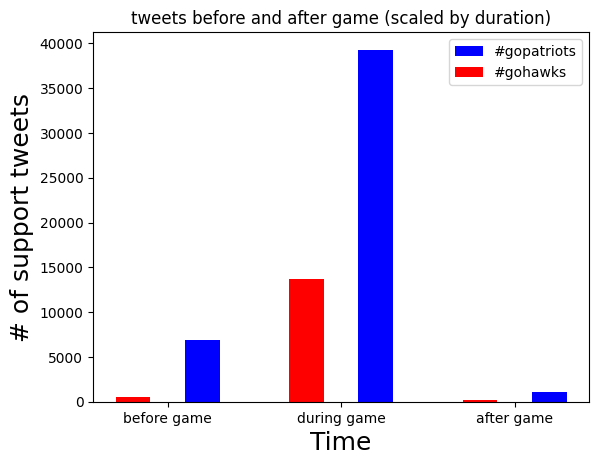

In [65]:

labels = ['before game', 'during game', 'after game']

width = 0.2
x = np.arange(0, 3)
plt.bar(x + 0.2, [len(gohawks_before_game)/ gohawks_before, 
                  len(gohawks_in_game), len(gohawks_after_game)/ gohawks_after], width, color='blue')
plt.bar(x - 0.2, [len(gopatriots_before_game)/ gopatriots_before , 
                  len(gopatriots_in_game), len(gopatriots_after_game)/gopatriots_after], width, color='red')

plt.xticks(x, labels)
plt.xlabel("Time", size = 18)
plt.ylabel("# of support tweets", size = 18)
plt.legend(["#gopatriots", "#gohawks"])
plt.title("tweets before and after game (scaled by duration)")
plt.show()

### Analyzing the average Sentiment Trend

In [74]:
positive = ['amazing','beastmode','beat','best','big','enjoy','excited','goal','goat','good','great','happy',
 'history','huge','love','mvp','nice','pass','play','rock','score','strike','tackle','touchdown','well','win',
 'wow','yay','yes']

negative = ['angry','bad','boo','cry','damn','defeat','fail','fuck','garbage','hell','help','lose','loser',
 'lost','mad','miserable','need','no','please','poor','shit','suck','terrible','worst','wtf']

# stemming 
lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()

stop_word = set.union(set(stopwords.words('English')), set(text.ENGLISH_STOP_WORDS))

def get_pos(nltkTag):
    firstChar = nltkTag[0]
    if firstChar == 'J':
        return wordnet.ADJ
    if firstChar == 'S':
        return wordnet.ADJ_SAT
    if firstChar == 'V':
        return wordnet.VERB
    if firstChar == 'N':
        return wordnet.NOUN
    if firstChar == 'R':
        return wordnet.ADV
    return wordnet.NOUN

def stemmer(text):
    tokens = nltk.word_tokenize(text)
    stems = [ps.stem(tokens[i]) for i in range(0, len(tokens))]
    stems = ' '.join(stems)
    stems = re.sub(r'\w*\d\w*', '', stems)
    stems = re.sub('[.]', '', stems)
    stems = re.sub(' +', ' ', stems).strip()
    return stems


def preprocessStemNC(sample):
    sample = sample.split('.')
    sample = [stemmer(sentence) for sentence in sample]
    sample = '.'.join(sample)
    return sample


def lemmatize(text, stopWords=stop_word):
    tokens = nltk.word_tokenize(text)
    
    temp = [token for token in tokens if token not in stop_word]
    
    tokens = temp
    
    posTags = nltk.pos_tag(tokens)
    tags = [get_pos(w[1]) for w in posTags]
    lemmas = [lemmatizer.lemmatize(tokens[i], tags[i]) for i in range(0, len(tokens))]
    lemmas = ' '.join(lemmas)
    lemmas = re.sub(r'\w*\d\w*', '', lemmas)
    lemmas = re.sub('[.]', '', lemmas)
    lemmas = re.sub(' +', ' ', lemmas).strip()
    return lemmas

def lemmatize2(text, stopWords=stop_word):
    tokens = nltk.word_tokenize(text)
    
    temp = [token for token in tokens if token not in stop_word and not token.isdigit()]
    
    tokens = temp
    
    posTags = nltk.pos_tag(tokens)
    tags = [get_pos(w[1]) for w in posTags]
    lemmas = [lemmatizer.lemmatize(tokens[i], tags[i]) for i in range(0, len(tokens))]
    lemmas = ' '.join(lemmas)
    lemmas = re.sub(r'\w*\d\w*', '', lemmas)
    lemmas = re.sub('[.]', '', lemmas)
    lemmas = re.sub(' +', ' ', lemmas).strip()
    return lemmas


def preprocessNC(sample):
    sample = sample.split('.')
    sample = [lemmatize(sentence) for sentence in sample]
    sample = '.'.join(sample)
    return sample

def preprocess(sample):
    sample = sample.split('.')
    sample = [lemmatize2(sentence) for sentence in sample]
    sample = '.'.join(sample)
    return sample

def vectorizer(min_df = 3):
    return CountVectorizer(preprocessor=preprocessNC, stop_words='english', min_df=min_df)

def vectorizer2(min_df = 3):
    return CountVectorizer(preprocessor=preprocess, stop_words='english', min_df=min_df)

def get_sentiment(data, min_df=3):
    CV = vectorizer(min_df=min_df)
    
    try:
        counts = CV.fit_transform(data).toarray()

        word_dict = dict(enumerate(CV.get_feature_names_out().flatten(), 0))
        word_dict = dict((v, k) for k, v in word_dict.items())
        scores = []
        for i in range(len(data)):
            p = 0
            n = 0
            for pos in positive:
                if pos in word_dict:
                    p+= counts[i][word_dict[pos]]
            for neg in negative:
                if neg in word_dict:
                    n+= counts[i][word_dict[neg]]
            scores.append(np.sign(p - n))

        return np.mean(scores)
    except:
        return 0


In [76]:
gopatriots_in_game = gopatriots_in_game[gopatriots_in_game['lang'] == 'en']
gohawks_in_game = gohawks_in_game[gohawks_in_game['lang'] == 'en']

gopatriots_in_game['tweet'] = gopatriots_in_game['tweet'].apply(lambda x: x.lower())
gohawks_in_game['tweet'] = gohawks_in_game['tweet'].apply(lambda x: x.lower())


gopatriots_in_game['sentiment'] = gopatriots_in_game['sentiment'].astype('int')
gohawks_in_game['sentiment'] = gohawks_in_game['sentiment'].astype('int')


/var/folders/0j/7x4zddlx4ys13k7vlc50tr100000gn/T/ipykernel_41347/1358445391.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inGamegopatriots['tweet'] = inGamegopatriots['tweet'].apply(lambda x: x.lower())
/var/folders/0j/7x4zddlx4ys13k7vlc50tr100000gn/T/ipykernel_41347/1358445391.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inGamegohawks['tweet'] = inGamegohawks['tweet'].apply(lambda x: x.lower())
/var/folders/0j/7x4zddlx4ys13k7vlc50tr100000gn/T/ipykernel_41347/1358445391.py:5: SettingWithCopyWar

In [84]:
patriots = gopatriots_in_game.groupby(pd.Grouper(key = 'citation_date',
                                           freq = '3min')).apply(lambda x: get_sentiment(x['tweet']))

In [85]:
hawks = gohawks_in_game.groupby(pd.Grouper(key = 'citation_date', 
                                        freq = '3min')).apply(lambda x: get_sentiment(x['tweet']))


In [86]:
duration = ((datetime.datetime.fromisoformat(kickoff_time) - datetime.datetime.fromisoformat(end_time)).seconds)/(3*60)


Text(0, 0.5, 'Sentiment scores')

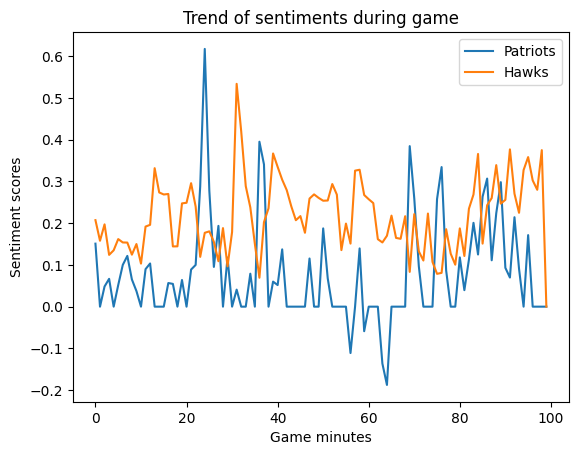

In [87]:
pat1 = patriots.values
haw1 = hawks.values
plt.plot(pat1, label = 'Patriots')
plt.plot(haw1, label = 'Hawks')
plt.legend()
plt.title("Trend of sentiments during game")
plt.xlabel("Game minutes")
plt.ylabel("Sentiment scores")

/var/folders/0j/7x4zddlx4ys13k7vlc50tr100000gn/T/ipykernel_41347/3823782273.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grp1 = inGamegopatriots.groupby(pd.Grouper(key = 'citation_date', freq = '3min')).mean()
/var/folders/0j/7x4zddlx4ys13k7vlc50tr100000gn/T/ipykernel_41347/3823782273.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grp2 = inGamegohawks.groupby(pd.Grouper(key = 'citation_date', freq = '3min')).mean()


Text(0, 0.5, 'Sentiment scores')

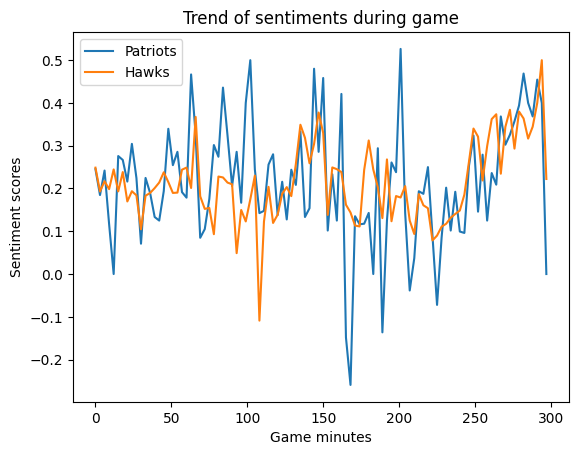

In [88]:
patriots = gopatriots_in_game.groupby(pd.Grouper(key = 'citation_date', freq = '3min')).mean()
hawks = gohawks_in_game.groupby(pd.Grouper(key = 'citation_date', freq = '3min')).mean()

plt.plot(np.arange(0, 300, 3), patriots['sentiment'], label='Patriots')
plt.plot(np.arange(0, 300, 3), hawks['sentiment'], label='Hawks')
plt.legend()

plt.title("Trend of sentiments during game")
plt.xlabel("Game minutes")
plt.ylabel("Sentiment scores")

### Identifying the Key Moment in a Game

In [103]:
def getKeyTweets(data, player):
    tweets = data.split('.')
    player = player.lower()
    
    text = []
    for tw in tweets:
        name = player.split(' ')
        a = (' ' + name[0] + ' ').lower()
        b = (' ' + name[0] + ' ').lower()
        c = (' ' + name[1] + ' ').lower()
        d = (' ' + name[1] + ' ').lower()
        e = (name[0]+name[1]).lower()
        if (player.lower() in tw) or (e in tw):
            text.append(tw)
        else:
            if (a in tw) or (b in tw):
                text.append(tw)
            elif (c in tw) or (d in tw):
                text.append(tw)
    
    if len(text) > 30:
        text = np.random.choice(text, 30, replace=False)
     
    summary = []
    indices = np.arange(0, len(text), 10)
    for i in range(len(indices)):
        start = indices[i]
        end = indices[i] + 10
        content = '. '.join(text[start : end])
        summary.append(summ(content))
    
    return '. '.join(summary)

def plot_tweet_frquency(data, duration, title, x_label, y_label):
    frequency = str(duration) + 'min'
    
    tweet_frquency = data[['citation_date', 'location']].groupby(
        pd.Grouper(key = 'citation_date', freq = frequency)).count()['location'].to_numpy()
    
    total = (data['citation_date'].to_numpy()[-1] - data['citation_date'].to_numpy()[0])
    time_range = (total.seconds / (60))
    x = np.arange(0, time_range, duration)
    plt.plot(x, tweet_frquency)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    
def plot_and_get_key_moment(data, duration, title, x_label, y_label, Thresh):
    frequency = str(duration) + 'min'
    
    tweet_frquency = data[['citation_date', 'location']].groupby(
        pd.Grouper(key = 'citation_date', freq = str(duration) + 'min')).count()['location'].to_numpy()
    
    timestamps = data[['citation_date', 'location']].groupby(
        pd.Grouper(key = 'citation_date', freq = str(duration) + 'min')).count().index.to_numpy()
    
    peaks, _ = find_peaks(tweet_frquency, height=0, threshold=Thresh)
    
    total = (data['citation_date'].to_numpy()[-1] - data['citation_date'].to_numpy()[0])
    time_range = np.ceil(total.seconds / (60))
    x = np.arange(0, time_range, duration)
    
    plt.plot(x, tweet_frquency)
    plt.plot(peaks*duration, tweet_frquency[peaks], "o", color='r')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    
    tweets = []
    for peak in peaks:
        ts = timestamps[peak]
        
        start = ts
        end = start + datetime.timedelta(minutes = duration)
        text = data[(data['citation_date'] >= start) & (data['citation_date'] <= end)]['tweet'].to_list()
        tweets.append('. '.join(text))
    
    return peaks, timestamps[peaks], tweets

def getAssociatedPlayers(keyData, roster):
    keyPoints = len(keyData)
    
    counts = {}
    for player in roster:
        player = player.lower()
        counts[player] = 0
        name = player.split(' ')
        a = (' ' + name[0] + ' ').lower()
        b = (' ' + name[0] + ' ').lower()
        c = (' ' + name[1] + ' ').lower()
        d = (' ' + name[1] + ' ').lower()
        e = (name[0]+name[1]).lower()
        
        temp = keyData
        counts[player]+= len(re.findall(player, temp))
        temp = re.sub(player, '', temp)
        
        counts[player]+= len(re.findall(a, temp))
        temp = re.sub(a, '', temp)
        
        counts[player]+= len(re.findall(b, temp))
        temp = re.sub(b, '', temp)
        
        counts[player]+= len(re.findall(c, temp))
        temp = re.sub(c, '', temp)
        
        counts[player]+= len(re.findall(d, temp))
        temp = re.sub(d, '', temp)
        
        counts[player]+= len(re.findall(e, temp))
        temp = re.sub(e, '', temp)
    
    counts = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))
    return counts


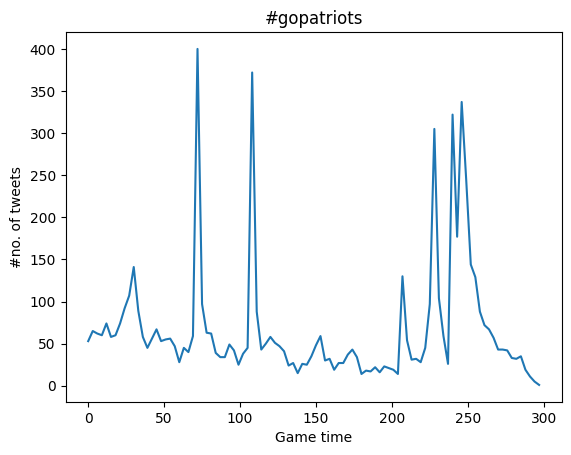

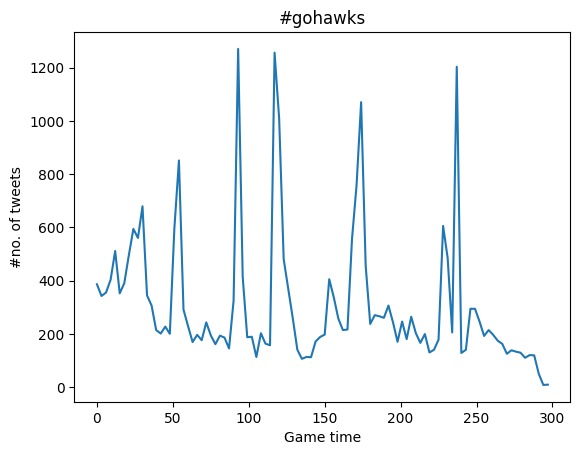

In [97]:
plot_tweet_frquency(gopatriots_in_game, 3, "#gopatriots", "Game time", "#no. of tweets")

plot_tweet_frquency(gohawks_in_game, 3, "#gohawks", "Game time", "#no. of tweets")


#### Plotting Key Moment in the Game

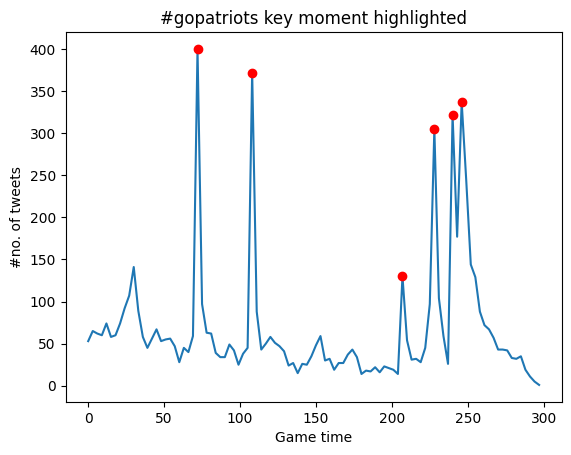

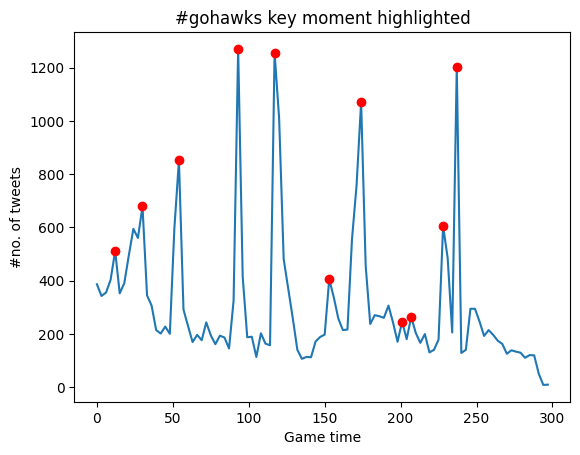

In [105]:
peaks_gopatriots, timestamp_gopatriots, tweet_gopatriots = plot_and_get_key_moment(inGamegopatriots, 3,
                                                 "#gopatriots key moment highlighted", "Game time", "#no. of tweets", 50)
peaks_gohawks, timestamp_gohawks, tweet_gohawks = plot_and_get_key_moment(inGamegohawks, 3, "#gohawks key moment highlighted", "Game time", "#no. of tweets", 50)


### Predicting Fanbase from Tweet 

In [107]:
superbowl_data = createData('tweets_#superbowl.txt')
print("superbowl data processed")

superbowl data processed


In [108]:
superbowl_data['citation_date'] = pd.to_numeric(superbowl_data['citation_date']).astype(np.int64)
superbowl_data = superbowl_data.sort_values(by = ['citation_date'], ignore_index=True)
superbowl_data['citation_date'] = superbowl_data['citation_date'].apply(lambda x: datetime.datetime.fromtimestamp(x, pst_tz))

In [109]:
superbowl_data_english = superbowl_data[superbowl_data['lang'] == 'en']
superbowl_data_english['lang'].value_counts()

en    949540
Name: lang, dtype: int64

In [112]:
import geonamescache

In [113]:
gen_cache = geonamescache.GeonamesCache()


In [114]:
# 'countrycode': 'US'
# 'admin1code': 'MA'
#  'admin1code': 'WA'
#  countrycode': 'US'

city_keys = list(gen_cache.get_cities().keys())

cities = gen_cache.get_cities()

WA_cities = []
MA_cities = []

for key in city_keys:
    city = cities[key]
    if city['countrycode'] == 'US' and city['admin1code'] == 'MA':
        MA_cities.append(city['name'].lower())
    elif city['countrycode'] == 'US' and city['admin1code'] == 'WA':
        WA_cities.append(city['name'].lower())

In [115]:
def is_WA_city(location):
    if location.lower() in WA_cities:
        return 'WA'
    if " WA" in location or ("Washington" in location and "DC" not in location and "D.C." not in location):
        return 'WA'
    return False

def is_MA_city(location):
    if location.lower() in MA_cities:
        return 'MA'
    if " MA" in location or "Massachusetts" in location:
        return 'MA'
    return False

def is_WA_or_MA(location):
    x = is_WA_city(location)
    y = is_MA_city(location)
    return x or y

def get_SVD(n_comp, data):
    SVD = TruncatedSVD(n_components=n_comp, random_state=42)
    SVD.fit(data)
    return SVD

In [116]:
superbowl_data_english['location'] = superbowl_data_english['location'].apply(lambda x: is_WA_or_MA(x))
superbowl_data_english = superbowl_data_english[(superbowl_data_english['location'] == 'WA') | (superbowl_data_english['location'] == 'MA')]
superbowl_data_english['location'].value_counts()

/var/folders/0j/7x4zddlx4ys13k7vlc50tr100000gn/T/ipykernel_41347/3839768258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  superbowl_data_english['location'] = superbowl_data_english['location'].apply(lambda x: is_WA_or_MA(x))


MA    16574
WA    15784
Name: location, dtype: int64

In [118]:
input_data = superbowl_data_english[['tweet', 'location']]
input_data['location'].value_counts()


MA    16574
WA    15784
Name: location, dtype: int64

In [122]:
x_train, x_test, y_train, y_test = train_test_split(input_data['tweet'],
                                                    input_data['location'], test_size=0.20, random_state=42)


print(" Train data Size =  {}, and Test data Size = {} ".format(len(x_train), len(x_test)))

 Train data Size =  25886, and Test data Size = 6472 


In [123]:
CV = vectorizer2(min_df=3)

feature_pipeline = Pipeline([
    ('count', CV),
    ('tfidf', TfidfTransformer(smooth_idf=True, use_idf=True))
]).fit(x_train)

In [124]:
train_tfidf = feature_pipeline.transform(x_train)
test_tfidf = feature_pipeline.transform(x_test)

features = len(feature_pipeline['count'].get_feature_names_out())
print("total features = ", features)

total features =  6340


In [125]:
n_components = 1000
SVD = get_SVD(n_components, train_tfidf)


Text(0, 0.5, 'Varaince Retained')

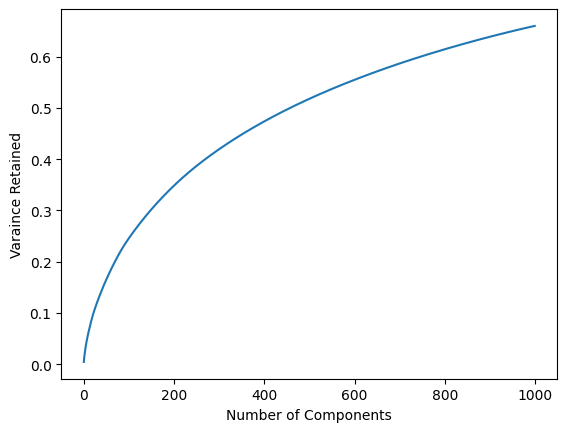

In [126]:
plt.plot(np.arange(1000), np.cumsum(SVD.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Varaince Retained")

In [127]:
n_components = 200
SVD = get_SVD(n_components, train_tfidf)
train_tfidf = SVD.transform(train_tfidf)
test_tfidf = SVD.transform(test_tfidf)

In [128]:
grid_search_logistic_regression = Pipeline([
    ('clf', LogisticRegression(penalty='l1', C = 0.1, random_state=42, solver='saga'))
])

params_logistic_regression = {
    'clf__C': [10.0**i for i in np.arange(-4,4)],
    'clf__penalty': ['l1', 'l2', 'elasticnet']
}


In [129]:
grid_logistic_regression = GridSearchCV(grid_search_logistic_regression, param_grid=params_logistic_regression, cv=5, verbose=0, n_jobs=-1, 
                     scoring='accuracy').fit(train_tfidf, y_train)

/Users/diplavsrivastava/opt/anaconda3/envs/ECE219_1/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/diplavsrivastava/opt/anaconda3/envs/ECE219_1/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/diplavsrivastava/opt/anaconda3/envs/ECE219_1/lib/python3.10/site-packages/sklearn/pipeline.py", line 406, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/diplavsrivastava/opt/anaconda

In [130]:
df_logistic_regression = pd.DataFrame(grid_logistic_regression.cv_results_)


In [131]:
df_logistic_regression.sort_values(by=['mean_test_score'], ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,1.509012,0.016660,0.014604,0.001610,1.0,l1,"{'clf__C': 1.0, 'clf__penalty': 'l1'}",0.746620,0.751787,0.743288,0.737686,0.750048,0.745886,0.005033,1
13,1.040135,0.016969,0.014922,0.000557,1.0,l2,"{'clf__C': 1.0, 'clf__penalty': 'l2'}",0.748552,0.749082,0.740583,0.739231,0.748503,0.745190,0.004339,2
15,1.666852,0.075627,0.013392,0.000716,10.0,l1,"{'clf__C': 10.0, 'clf__penalty': 'l1'}",0.746234,0.748117,0.743867,0.739231,0.748117,0.745113,0.003330,3
21,2.289215,0.363269,0.014414,0.004737,1000.0,l1,"{'clf__C': 1000.0, 'clf__penalty': 'l1'}",0.746620,0.746185,0.744253,0.739424,0.746571,0.744611,0.002734,4
18,2.346098,0.374142,0.016646,0.002826,100.0,l1,"{'clf__C': 100.0, 'clf__penalty': 'l1'}",0.746427,0.746185,0.744060,0.739038,0.746765,0.744495,0.002888,5


In [132]:
clf_logistic_regression = LogisticRegression(penalty='l1', C = 1.0, random_state=42,
                           solver='saga')

preds_logistic_regression = clf_logistic_regression.fit(train_tfidf, y_train).predict(test_tfidf)



In [134]:
print("Test Accuracy for logistic regression = ", accuracy_score(y_test, preds_logistic_regression))

print("\n Scores for logistic regression\n")
print('Accuracy = ', accuracy_score(y_test, preds_logistic_regression))
print('Recall = ', recall_score(y_test, preds_logistic_regression, average='macro'))
print('Precision = ', precision_score(y_test, preds_logistic_regression, average='macro'))
print('F1_Score = ', f1_score(y_test, preds_logistic_regression, average='macro'))


Test Accuracy for logistic regression =  0.7456736711990112

 Scores for logistic classifier

Accuracy =  0.7456736711990112
Recall =  0.7413389559645515
Precision =  0.766136376284409
F1_Score =  0.7382772392430639



 Confusion Matrix for logistic regression 



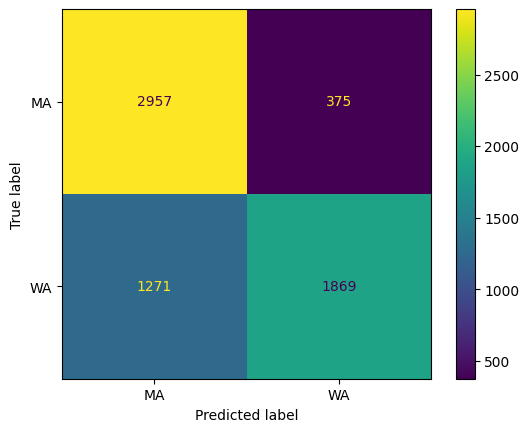

In [144]:
print("\n Confusion Matrix for logistic regression \n")
cm = confusion_matrix(y_test, preds_logistic_regression, labels=clf_logistic_regression.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf_logistic_regression.classes_)
disp.plot()
plt.show()

In [150]:
grid_search_SVC = Pipeline([
    ('clf', LinearSVC(penalty='l1', C = 1.0, loss='hinge', random_state=42,max_iter=10000))
])

params_SVC = {
    'clf__penalty': ['l1', 'l2'],
    'clf__C': [1, 10, 100, 1000, 0.1, 0.01, 0.001],
    'clf__loss': ['hinge', 'squared_hinge']
}

In [153]:
grid_SVC = GridSearchCV(grid_search_SVC, param_grid=params_SVC, cv=5, verbose=0, 
                     scoring='accuracy').fit(train_tfidf, y_train)

/Users/diplavsrivastava/opt/anaconda3/envs/ECE219_1/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/diplavsrivastava/opt/anaconda3/envs/ECE219_1/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/diplavsrivastava/opt/anaconda3/envs/ECE219_1/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/diplavsrivastava/opt/anaconda3/envs/ECE219_1/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/diplavsrivastava/opt/anaconda3/envs/ECE219_1/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, in

/Users/diplavsrivastava/opt/anaconda3/envs/ECE219_1/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [154]:
df_SVC = pd.DataFrame(grid_SVC.cv_results_)
df_SVC.sort_values(by=['mean_test_score'], ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__loss,param_clf__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,13.705674,0.327103,0.008697,0.002060,100,squared_hinge,l2,"{'clf__C': 100, 'clf__loss': 'squared_hinge', ...",0.749517,0.746958,0.743288,0.738459,0.748503,0.745345,0.004041,1
19,0.246466,0.015597,0.007845,0.000222,0.1,squared_hinge,l2,"{'clf__C': 0.1, 'clf__loss': 'squared_hinge', ...",0.746620,0.749469,0.739618,0.739231,0.751014,0.745190,0.004916,2
3,0.693518,0.064562,0.007792,0.000725,1,squared_hinge,l2,"{'clf__C': 1, 'clf__loss': 'squared_hinge', 'c...",0.747007,0.748310,0.740390,0.739231,0.747537,0.744495,0.003865,3
7,6.104826,1.304292,0.008015,0.000212,10,squared_hinge,l2,"{'clf__C': 10, 'clf__loss': 'squared_hinge', '...",0.747586,0.746958,0.741163,0.739038,0.747151,0.744379,0.003563,4
9,5.208173,0.464787,0.008242,0.000588,100,hinge,l2,"{'clf__C': 100, 'clf__loss': 'hinge', 'clf__pe...",0.747779,0.748696,0.738845,0.739811,0.744833,0.743993,0.004029,5


In [155]:
clf_SVC = LinearSVC(penalty='l2', C = 100, loss='squared_hinge', random_state=42)

preds_SVC = clf_SVC.fit(train_tfidf, y_train).predict(test_tfidf)

/Users/diplavsrivastava/opt/anaconda3/envs/ECE219_1/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [158]:
print("Test accuracy for SVC classifier = ", accuracy_score(y_test, preds_SVC))


print("\n Scores for SVC classifier \n")

print('Accuracy = ', accuracy_score(y_test, preds_SVC))
print('Recall = ', recall_score(y_test, preds_SVC, average='macro'))
print('Precision = ', precision_score(y_test, preds_SVC, average='macro'))
print('F1_Score = ', f1_score(y_test, preds_SVC, average='macro'))


Test accuracy for SVC classifier =  0.7469097651421508

 Scores for SVC classifier 

Accuracy =  0.7469097651421508
Recall =  0.7421999372997606
Precision =  0.7719416369220731
F1_Score =  0.7383590910127489



 Confusion Matrix for SVC classifier 



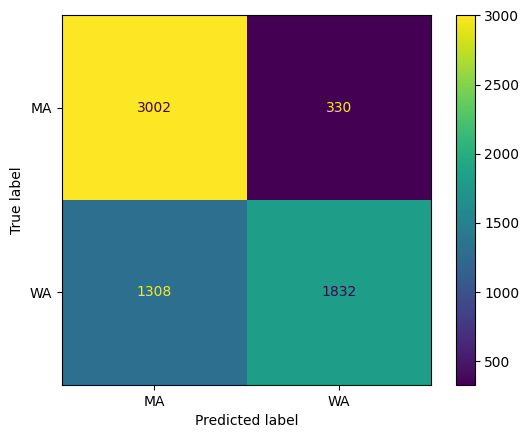

In [159]:
print("\n Confusion Matrix for SVC classifier \n")
cm = confusion_matrix(y_test, preds_SVC, labels=clf_SVC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf_SVC.classes_)
disp.plot()
plt.show()